In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

import pandas as pd

df = pd.read_csv('/root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1/spam.csv', encoding='latin1')

df.columns = ['label', 'text', 'Unnamed1', 'Unnamed2', 'Unnamed3']

df = df.drop(columns=['Unnamed1', 'Unnamed2', 'Unnamed3'])

print(df.head())



100%|██████████| 211k/211k [00:00<00:00, 493kB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [5]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: text_length, dtype: float64


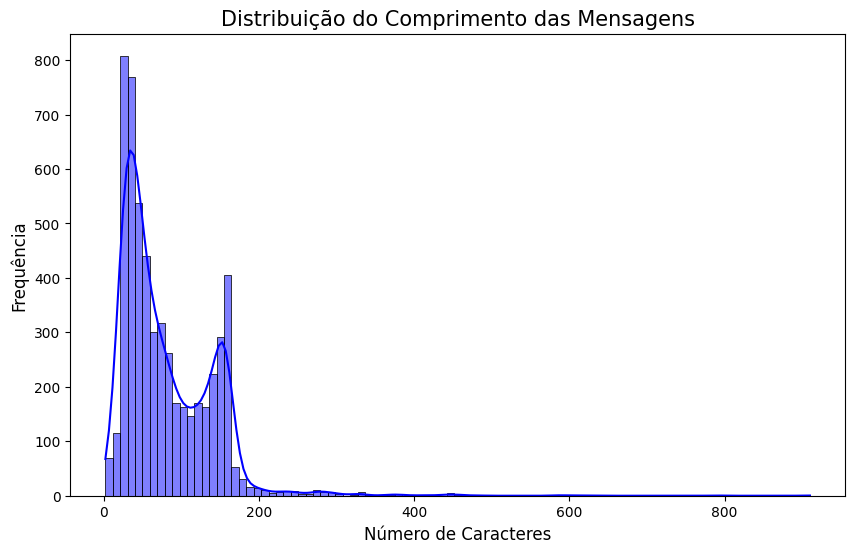

In [8]:
# Comprimento de cada mensagem (número de caracteres)
df['text_length'] = df['text'].apply(len)

# Estatísticas sobre o comprimento das mensagens
print(df['text_length'].describe())

# Plotar a distribuição do comprimento das mensagens
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], kde=True, color='blue')
plt.title('Distribuição do Comprimento das Mensagens', fontsize=15)
plt.xlabel('Número de Caracteres', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()


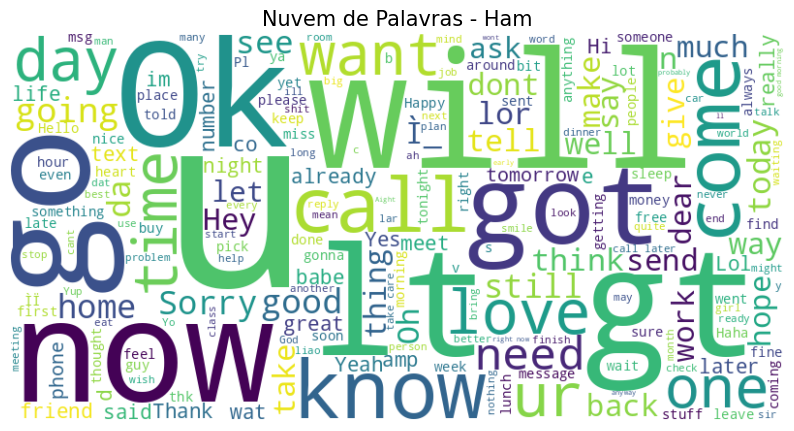

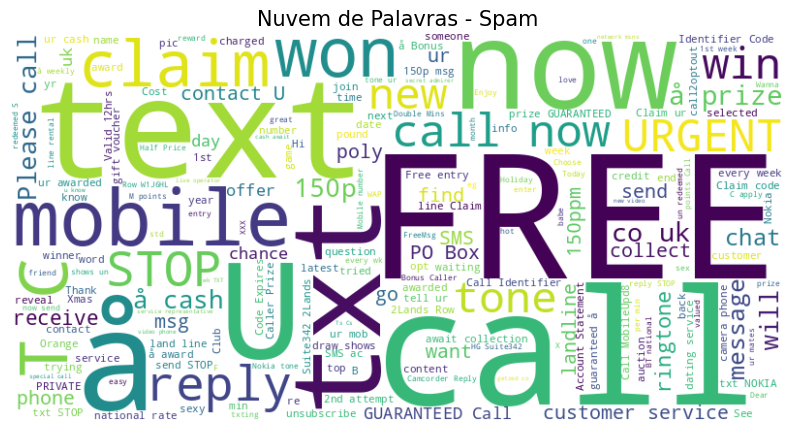

In [9]:
from wordcloud import WordCloud

# Separando os dados em spam e ham
ham_messages = df[df['label'] == 'ham']['text']
spam_messages = df[df['label'] == 'spam']['text']

# Gerar nuvem de palavras para 'ham' (legítimas)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))
plt.figure(figsize=(10,6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras - Ham', fontsize=15)
plt.axis('off')
plt.show()

# Gerar nuvem de palavras para 'spam'
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages))
plt.figure(figsize=(10,6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras - Spam', fontsize=15)
plt.axis('off')
plt.show()


In [10]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Função para remover palavras comuns (stopwords)
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.split()
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return words

# Aplicar o pré-processamento nas mensagens
ham_words = ' '.join(ham_messages).split()
spam_words = ' '.join(spam_messages).split()

# Contar as palavras mais comuns
ham_word_freq = Counter(ham_words)
spam_word_freq = Counter(spam_words)

# Mostrar as 10 palavras mais comuns em 'ham'
print("10 palavras mais comuns em 'ham':", ham_word_freq.most_common(10))

# Mostrar as 10 palavras mais comuns em 'spam'
print("10 palavras mais comuns em 'spam':", spam_word_freq.most_common(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...


10 palavras mais comuns em 'ham': [('to', 1530), ('you', 1458), ('I', 1436), ('the', 1019), ('a', 969), ('and', 738), ('i', 736), ('in', 734), ('u', 645), ('is', 638)]
10 palavras mais comuns em 'spam': [('to', 604), ('a', 358), ('your', 187), ('call', 185), ('or', 185), ('the', 178), ('2', 169), ('for', 169), ('you', 164), ('is', 143)]


[nltk_data]   Unzipping corpora/stopwords.zip.
